# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
sat_data = pd.read_csv('../data/sat.csv')
act_data = pd.read_csv('../data/act.csv')

##### 2. Print the first ten rows of each dataframe.

In [2]:
sat_data[0:10]

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [3]:
act_data[0:10]  

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

SAT data:
    Unnamed 0: index column, should be deleted
    State: all 50 US states, plus  DC, plus a National column
    Particpation: % participation in SAT for each state
    Evidence-Based Reading and Writing: State average SAT EBRW score from 200 to 800, rounded to integer value
    Math: State average SAT Math score from 200 to 800, rounded to integer value
    Total: State average SAT total score from 400 to 800, rounded to integer value
    
ACT data:
    Unnamed 0: index column, should be deleted
    State: all 50 US states, plus  DC, plus a National column
    Particpation: % participation in ACT for each state
    English: State average ACT English score from 1 to 36, rounded to nearest decimal
    Math: State average ACT Math score from 1 to 36, rounded to nearest decimal
    Reading: State average ACT English score from 1 to 36, rounded to nearest decimal
    Science: State average ACT Science score from 1 to 36, rounded to nearest decimal
    Composite: State average ACT Composite (rounded average) score from 1 to 36, rounded to nearest decimal

In [4]:
#Removing Unnamed: 0 column

act_data = act_data.drop(['Unnamed: 0'], axis=1)
sat_data = sat_data.drop(['Unnamed: 0'], axis=1)

##### 4. Does the data look complete? Are there any obvious issues with the observations?

Some of the SAT Total scores are off by 1 point, possibly due to rounding.

Maryland's SAT Math score is 52, which is an impossibly low score. This is due to a typo; the correct value is 524.

Maryland's ACT Science score is 2.3, which is an unusually low score. This is due to a typo; the correct value is 23.2.

Due to the way ACT Composite scores are calculated (averaging 4 categories and rounding to integer), the average Composite scores for each state cannot be calulaated by averaging the individual category scores for that state


In [5]:
#Fix typo in Maryland's SAT Math score and ACT Science score

sat_data.iloc[20,3] = 524

act_data.iloc[21,5] = 23.2

##### 5. Print the types of each column.

In [6]:
sat_data.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [7]:
act_data.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [8]:
#Participation needs to be converted to a float.

sat_data['Participation'] = sat_data['Participation'].str.rstrip('%').astype('float') / 100.0

act_data['Participation'] = act_data['Participation'].str.rstrip('%').astype('float') / 100.0

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [9]:
sat_participation_dict = {key: value for key, value in sat_data[['State','Participation']].values.tolist()}
sat_ebrw_dict = {key: value for key, value in sat_data[['State','Evidence-Based Reading and Writing']].values.tolist()}
sat_math_dict = {key: value for key, value in sat_data[['State','Math']].values.tolist()}
sat_total_dict = {key: value for key, value in sat_data[['State','Total']].values.tolist()}

act_participation_dict = {key: value for key, value in act_data[['State','Participation']].values.tolist()}
act_english_dict = {key: value for key, value in act_data[['State','English']].values.tolist()}
act_math_dict = {key: value for key, value in act_data[['State','Math']].values.tolist()}
act_reading_dict = {key: value for key, value in act_data[['State','Reading']].values.tolist()}
act_science_dict = {key: value for key, value in act_data[['State','Science']].values.tolist()}
act_composite_dict = {key: value for key, value in act_data[['State','Composite']].values.tolist()}

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [10]:
sat_data_dict = {column_name: sat_data[column_name].values.tolist() for column_name in sat_data.columns.tolist()}

act_data_dict = {column_name: act_data[column_name].values.tolist() for column_name in act_data.columns.tolist()}

##### 9. Merge the dataframes on the state column.

In [11]:
act_sat_data = pd.merge(sat_data, act_data, on='State', how = 'outer')
act_sat_data

,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606.0,595.0,1201.0,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [12]:
act_sat_data = act_sat_data.rename(index=str, columns={'Participation_x': 'SAT_Participation',
       'Evidence-Based Reading and Writing':'SAT_EBRW', 'Math_x': 'SAT_Math', 'Total':'SAT_Total',
       'Participation_y': 'ACT_Participation', 'English': 'ACT_English', 'Math_y': 'ACT_Math', 'Reading': 'ACT_Reading', 'Science':'ACT_Science',
       'Composite': 'ACT_Composite'})

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [13]:
print(act_sat_data._get_numeric_data().min())

print(act_sat_data._get_numeric_data().max())

SAT_Participation      0.02
SAT_EBRW             482.00
SAT_Math             468.00
SAT_Total            950.00
ACT_Participation      0.08
ACT_English           16.30
ACT_Math              18.00
ACT_Reading           18.10
ACT_Science           18.20
ACT_Composite         17.80
dtype: float64
SAT_Participation       1.0
SAT_EBRW              644.0
SAT_Math              651.0
SAT_Total            1295.0
ACT_Participation       1.0
ACT_English            25.5
ACT_Math               25.3
ACT_Reading            26.0
ACT_Science            24.9
ACT_Composite          25.5
dtype: float64


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [14]:
sd = act_sat_data._get_numeric_data().std().values.tolist()

sd

[0.35276632270013036,
 45.66690138768932,
 47.12139516560329,
 92.49481172519046,
 0.3183251797460136,
 2.332131774228897,
 1.9636016712608966,
 2.048671533650611,
 1.7233512898347112,
 2.002083191096813]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [15]:
act_sat_data = act_sat_data.append(act_sat_data.std(), ignore_index=True)
act_sat_data.iloc[52,0] = "STD"

act_sat_data

,State,SAT_Participation,SAT_EBRW,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
0,Alabama,0.050000,593.000000,572.000000,1165.000000,1.000000,18.900000,18.400000,19.700000,19.400000,19.200000
1,Alaska,0.380000,547.000000,533.000000,1080.000000,0.650000,18.700000,19.800000,20.400000,19.900000,19.800000
2,Arizona,0.300000,563.000000,553.000000,1116.000000,0.620000,18.600000,19.800000,20.100000,19.800000,19.700000
3,Arkansas,0.030000,614.000000,594.000000,1208.000000,1.000000,18.900000,19.000000,19.700000,19.500000,19.400000
4,California,0.530000,531.000000,524.000000,1055.000000,0.310000,22.500000,22.700000,23.100000,22.200000,22.800000
5,Colorado,0.110000,606.000000,595.000000,1201.000000,1.000000,20.100000,20.300000,21.200000,20.900000,20.800000
6,Connecticut,1.000000,530.000000,512.000000,1041.000000,0.310000,25.500000,24.600000,25.600000,24.600000,25.200000
7,Delaware,1.000000,503.000000,492.000000,996.000000,0.180000,24.100000,23.400000,24.800000,23.600000,24.100000
8,District of Columbia,1.000000,482.000000,468.000000,950.000000,0.320000,24.400000,23.500000,24.900000,23.500000,24.200000
9,Florida,0.830000,520.000000,497.000000,1017.000000,0.730000,19.000000,19.400000,21.000000,19.400000,19.800000


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [16]:
act_sat_data.sort_values(by=['SAT_Participation'], ascending=False)

,State,SAT_Participation,SAT_EBRW,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
22,Michigan,1.000000,509.000000,495.000000,1005.000000,0.290000,24.100000,23.700000,24.500000,23.800000,24.100000
6,Connecticut,1.000000,530.000000,512.000000,1041.000000,0.310000,25.500000,24.600000,25.600000,24.600000,25.200000
7,Delaware,1.000000,503.000000,492.000000,996.000000,0.180000,24.100000,23.400000,24.800000,23.600000,24.100000
8,District of Columbia,1.000000,482.000000,468.000000,950.000000,0.320000,24.400000,23.500000,24.900000,23.500000,24.200000
29,New Hampshire,0.960000,532.000000,520.000000,1052.000000,0.180000,25.400000,25.100000,26.000000,24.900000,25.500000
19,Maine,0.950000,513.000000,499.000000,1012.000000,0.080000,24.200000,24.000000,24.800000,23.700000,24.300000
12,Idaho,0.930000,513.000000,493.000000,1005.000000,0.380000,21.900000,21.800000,23.000000,22.100000,22.300000
9,Florida,0.830000,520.000000,497.000000,1017.000000,0.730000,19.000000,19.400000,21.000000,19.400000,19.800000
21,Massachusetts,0.760000,555.000000,551.000000,1107.000000,0.290000,25.400000,25.300000,25.900000,24.700000,25.400000
39,Rhode Island,0.710000,539.000000,524.000000,1062.000000,0.210000,24.000000,23.300000,24.700000,23.400000,24.000000


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [17]:
act_sat_data[act_sat_data["ACT_Participation"]>.5]

,State,SAT_Participation,SAT_EBRW,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4
5,Colorado,0.11,606.0,595.0,1201.0,1.00,20.1,20.3,21.2,20.9,20.8
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8
10,Georgia,0.61,535.0,515.0,1050.0,0.55,21.0,20.9,22.0,21.3,21.4
11,Hawaii,0.55,544.0,541.0,1085.0,0.90,17.8,19.2,19.2,19.3,19.0
13,Illinois,0.09,559.0,556.0,1115.0,0.93,21.0,21.2,21.6,21.3,21.4
15,Iowa,0.02,641.0,635.0,1275.0,0.67,21.2,21.3,22.6,22.1,21.9


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [18]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [19]:
data_for_plots = act_sat_data.head(51)

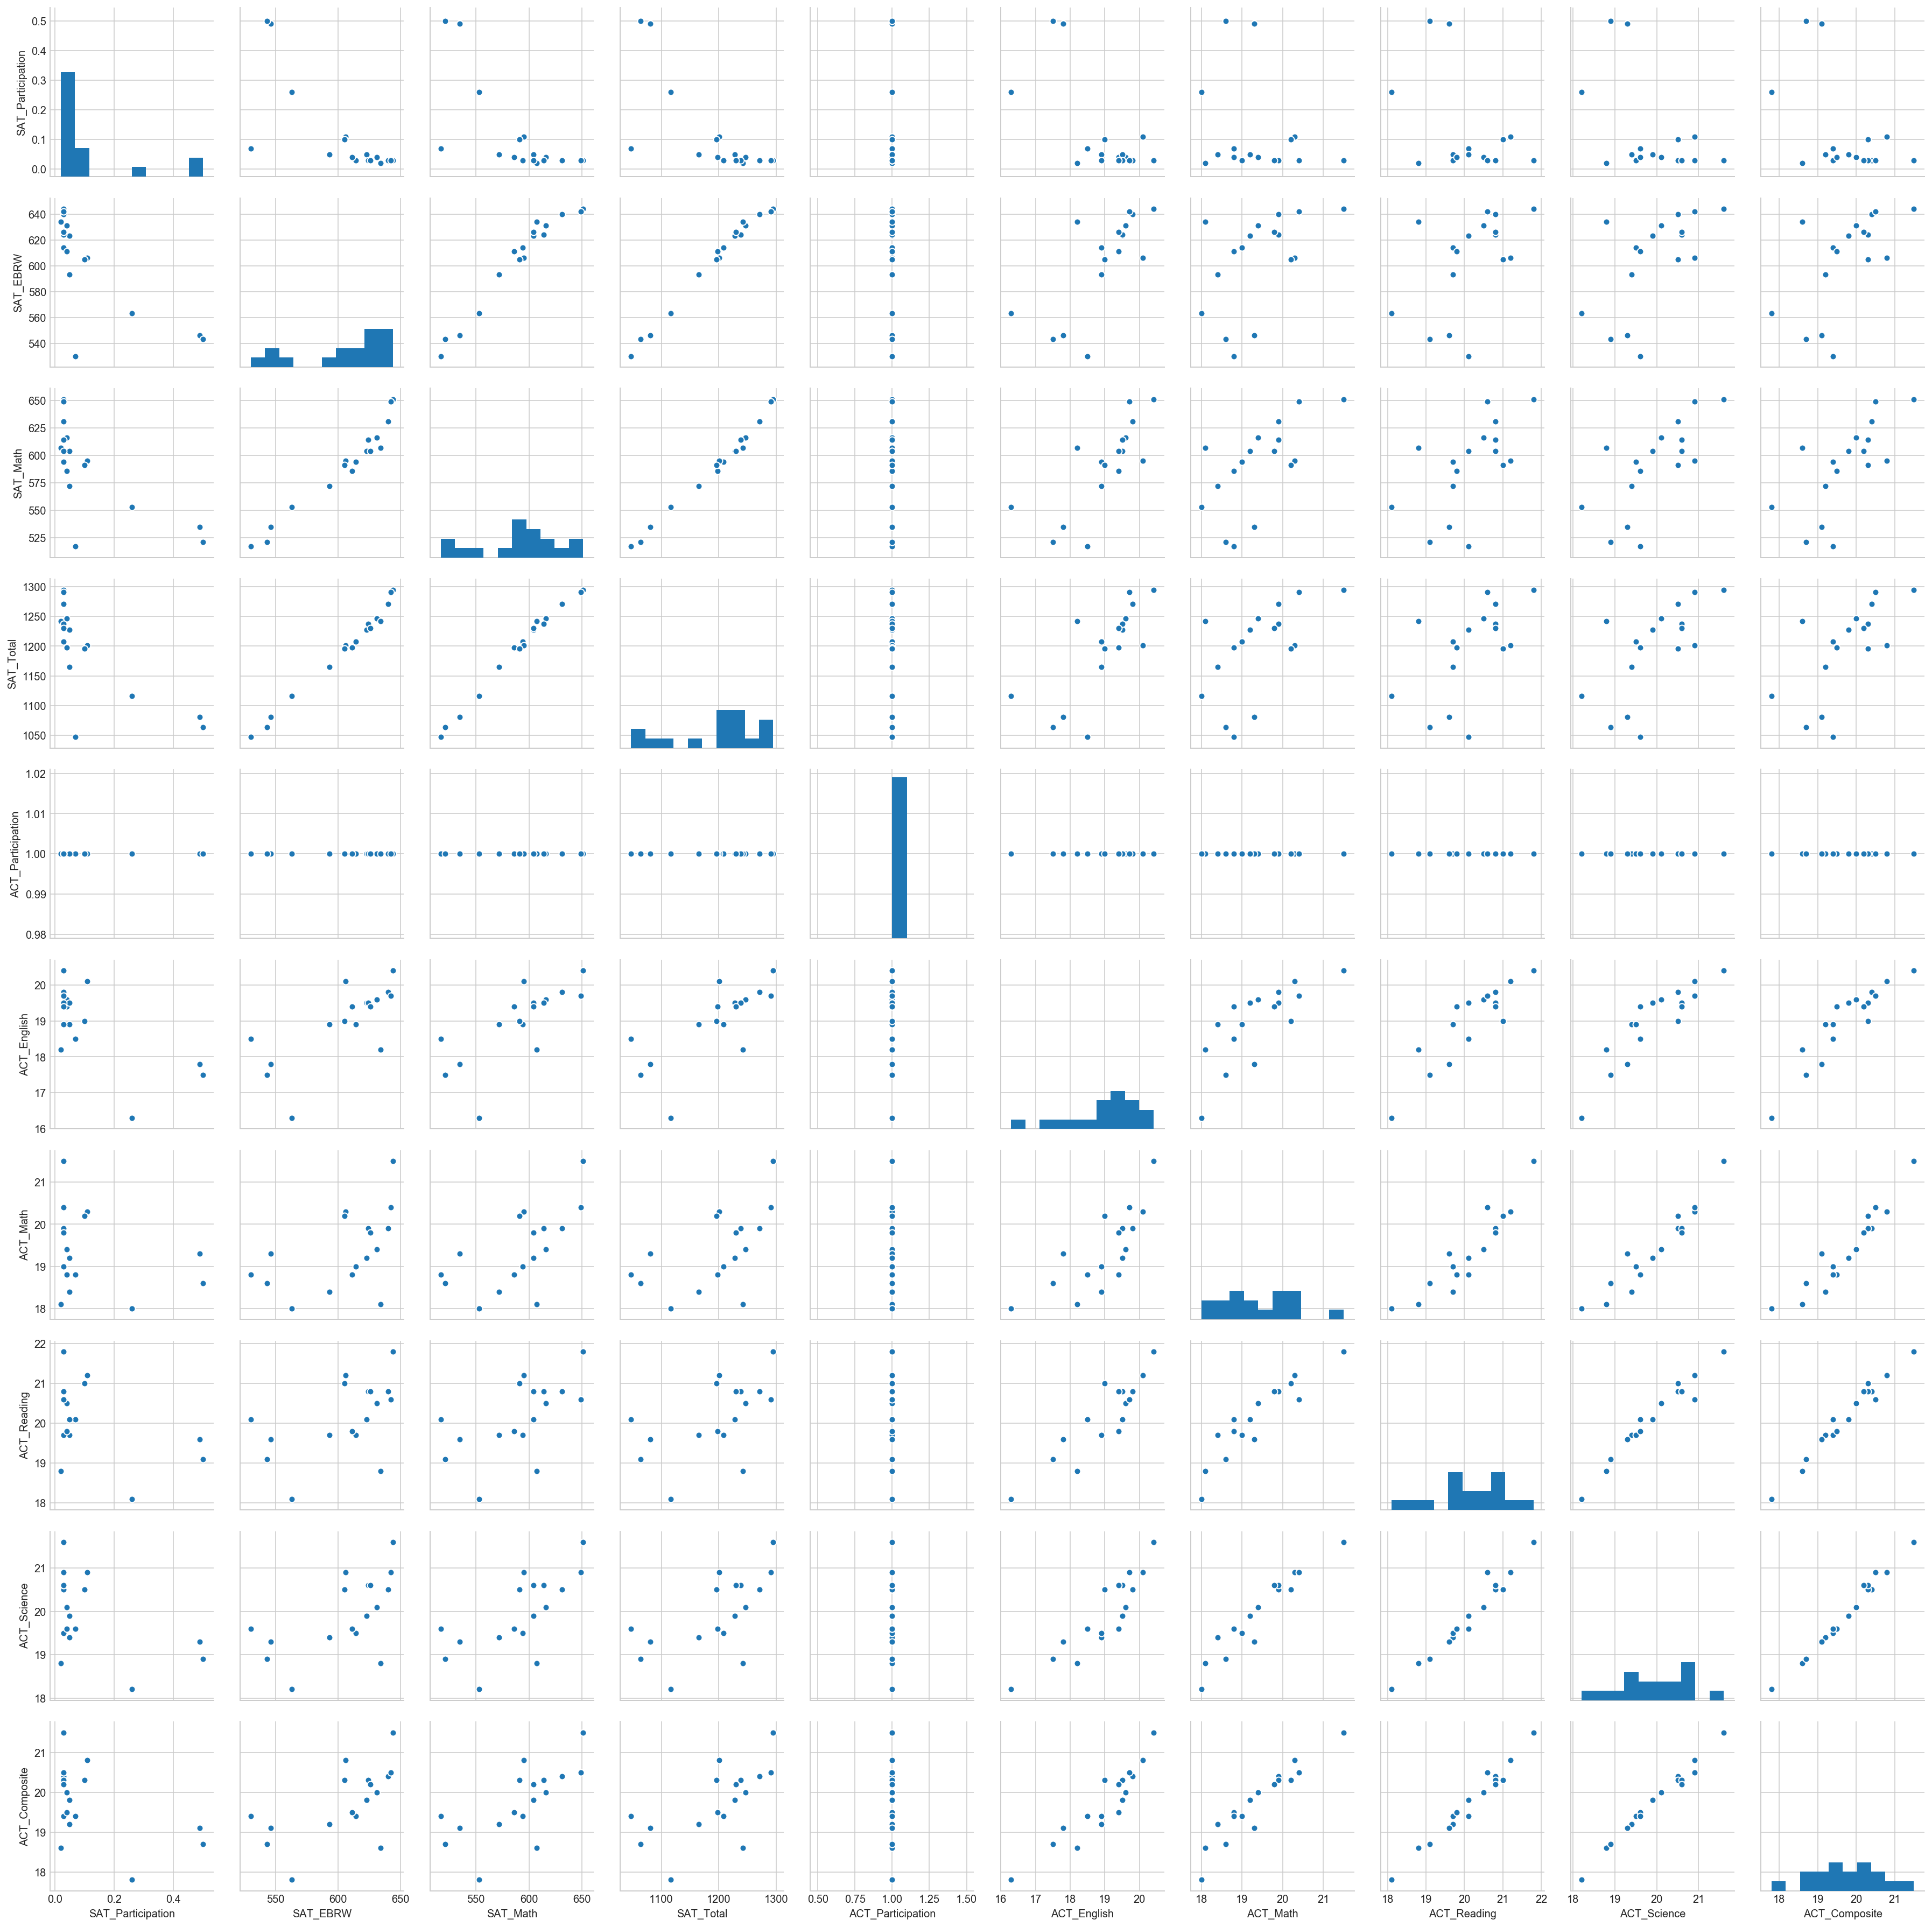

In [20]:
#looking at states with 100% ACT participation

sns.pairplot(data_for_plots[data_for_plots["ACT_Participation"]==1])

In [21]:
data_for_plots[data_for_plots["ACT_Participation"]==1].sort_values(by=['SAT_Participation'], ascending=False)

,State,SAT_Participation,SAT_EBRW,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
40,South Carolina,0.50,543.0,521.0,1064.0,1.0,17.5,18.6,19.1,18.9,18.7
33,North Carolina,0.49,546.0,535.0,1081.0,1.0,17.8,19.3,19.6,19.3,19.1
28,Nevada,0.26,563.0,553.0,1116.0,1.0,16.3,18.0,18.1,18.2,17.8
5,Colorado,0.11,606.0,595.0,1201.0,1.0,20.1,20.3,21.2,20.9,20.8
26,Montana,0.10,605.0,591.0,1196.0,1.0,19.0,20.2,21.0,20.5,20.3
36,Oklahoma,0.07,530.0,517.0,1047.0,1.0,18.5,18.8,20.1,19.6,19.4
42,Tennessee,0.05,623.0,604.0,1228.0,1.0,19.5,19.2,20.1,19.9,19.8
0,Alabama,0.05,593.0,572.0,1165.0,1.0,18.9,18.4,19.7,19.4,19.2
18,Louisiana,0.04,611.0,586.0,1198.0,1.0,19.4,18.8,19.8,19.6,19.5
17,Kentucky,0.04,631.0,616.0,1247.0,1.0,19.6,19.4,20.5,20.1,20.0


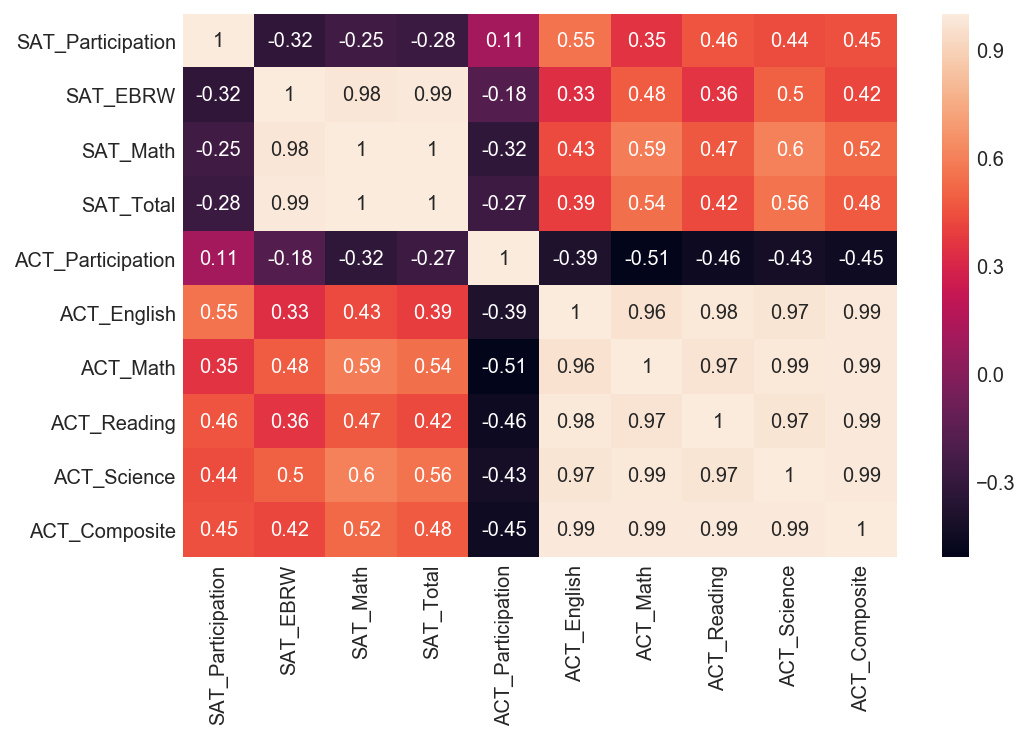

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(data_for_plots[data_for_plots["SAT_Participation"]>.9].corr(), annot=True)

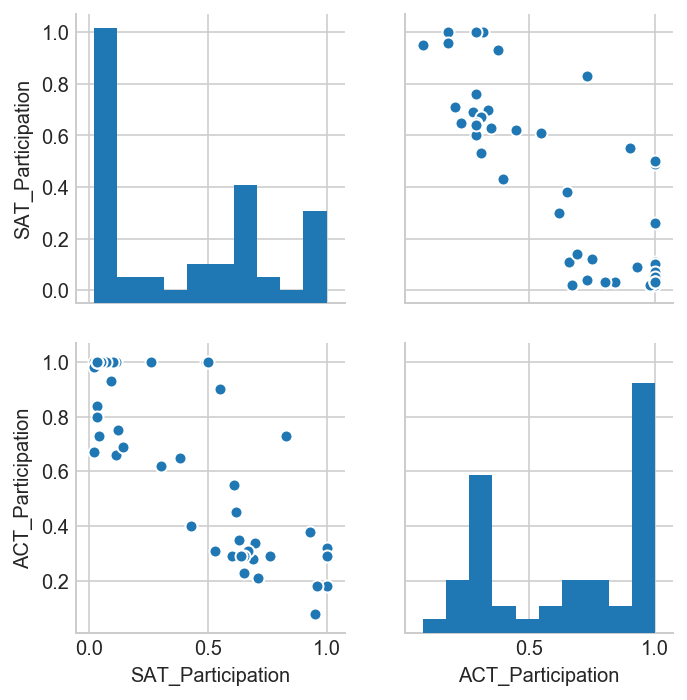

In [23]:
sns.pairplot(data_for_plots[['SAT_Participation','ACT_Participation']])

##### 17. Plot the Math(s) distributions from both data sets.

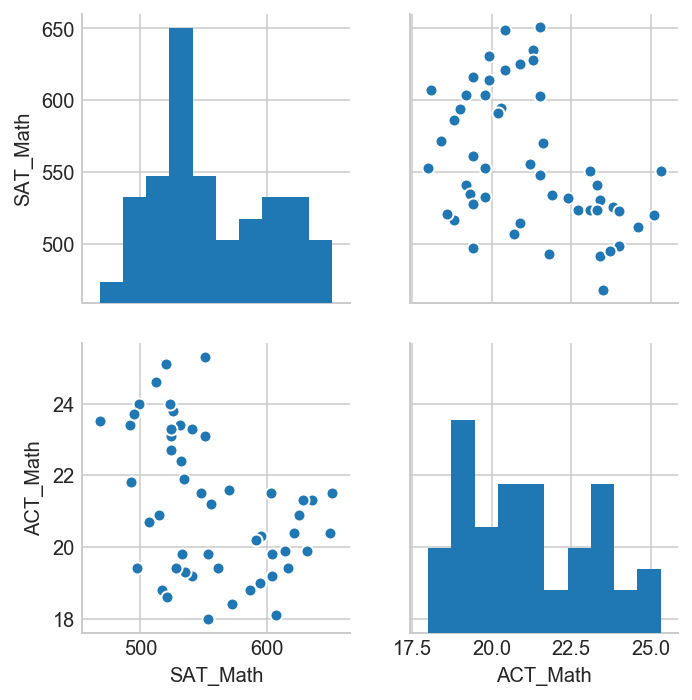

In [24]:
sns.pairplot(data_for_plots[['SAT_Math','ACT_Math']])

##### 18. Plot the Verbal distributions from both data sets.

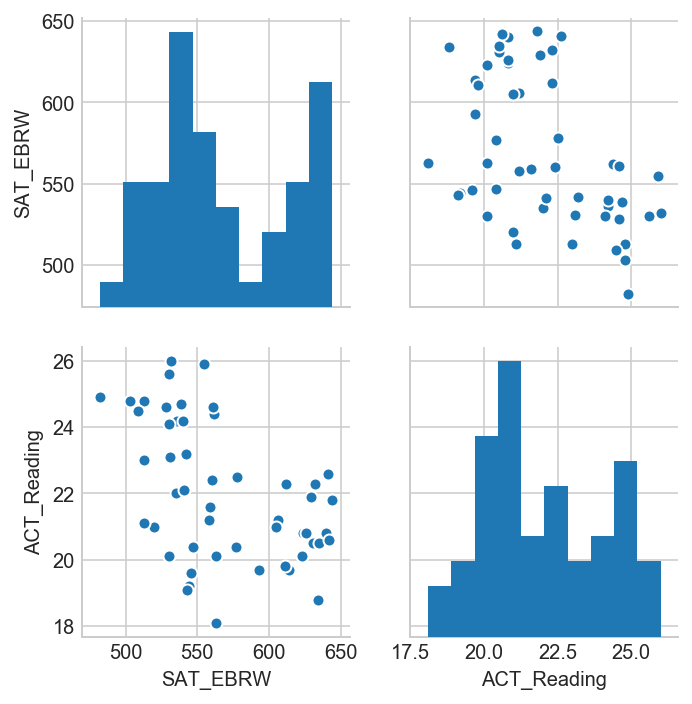

In [25]:
sns.pairplot(data_for_plots[['SAT_EBRW','ACT_Reading']])

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [26]:
# We assume that data is normally distributed

##### 20. Does this assumption hold true for any of our columns? Which?

In [27]:
#SAT_Math, ACT_English, and ACT_Science have a greater than 5% change of being normally distributed

{str(data_for_plots[[column]].columns.values): stats.normaltest(data_for_plots[column]) for column in data_for_plots._get_numeric_data()}

{"['SAT_Participation']": NormaltestResult(statistic=24.84401282693096, pvalue=4.02894334576706e-06),
 "['SAT_EBRW']": NormaltestResult(statistic=13.81815328788405, pvalue=0.0009986795076584),
 "['SAT_Math']": NormaltestResult(statistic=5.762201767738943, pvalue=0.056072998982864684),
 "['SAT_Total']": NormaltestResult(statistic=9.607185954097002, pvalue=0.008200230814088539),
 "['ACT_Participation']": NormaltestResult(statistic=72.50510406893649, pvalue=1.8018419611696658e-16),
 "['ACT_English']": NormaltestResult(statistic=4.945616782086351, pvalue=0.08434764489205682),
 "['ACT_Math']": NormaltestResult(statistic=6.547294554392776, pvalue=0.03786805958606832),
 "['ACT_Reading']": NormaltestResult(statistic=6.248639549660324, pvalue=0.04396683079879635),
 "['ACT_Science']": NormaltestResult(statistic=5.501326521192357, pvalue=0.06388547443366324),
 "['ACT_Composite']": NormaltestResult(statistic=6.557389886662569, pvalue=0.03767739587231253)}

##### 21. Plot some scatterplots examining relationships between all variables.

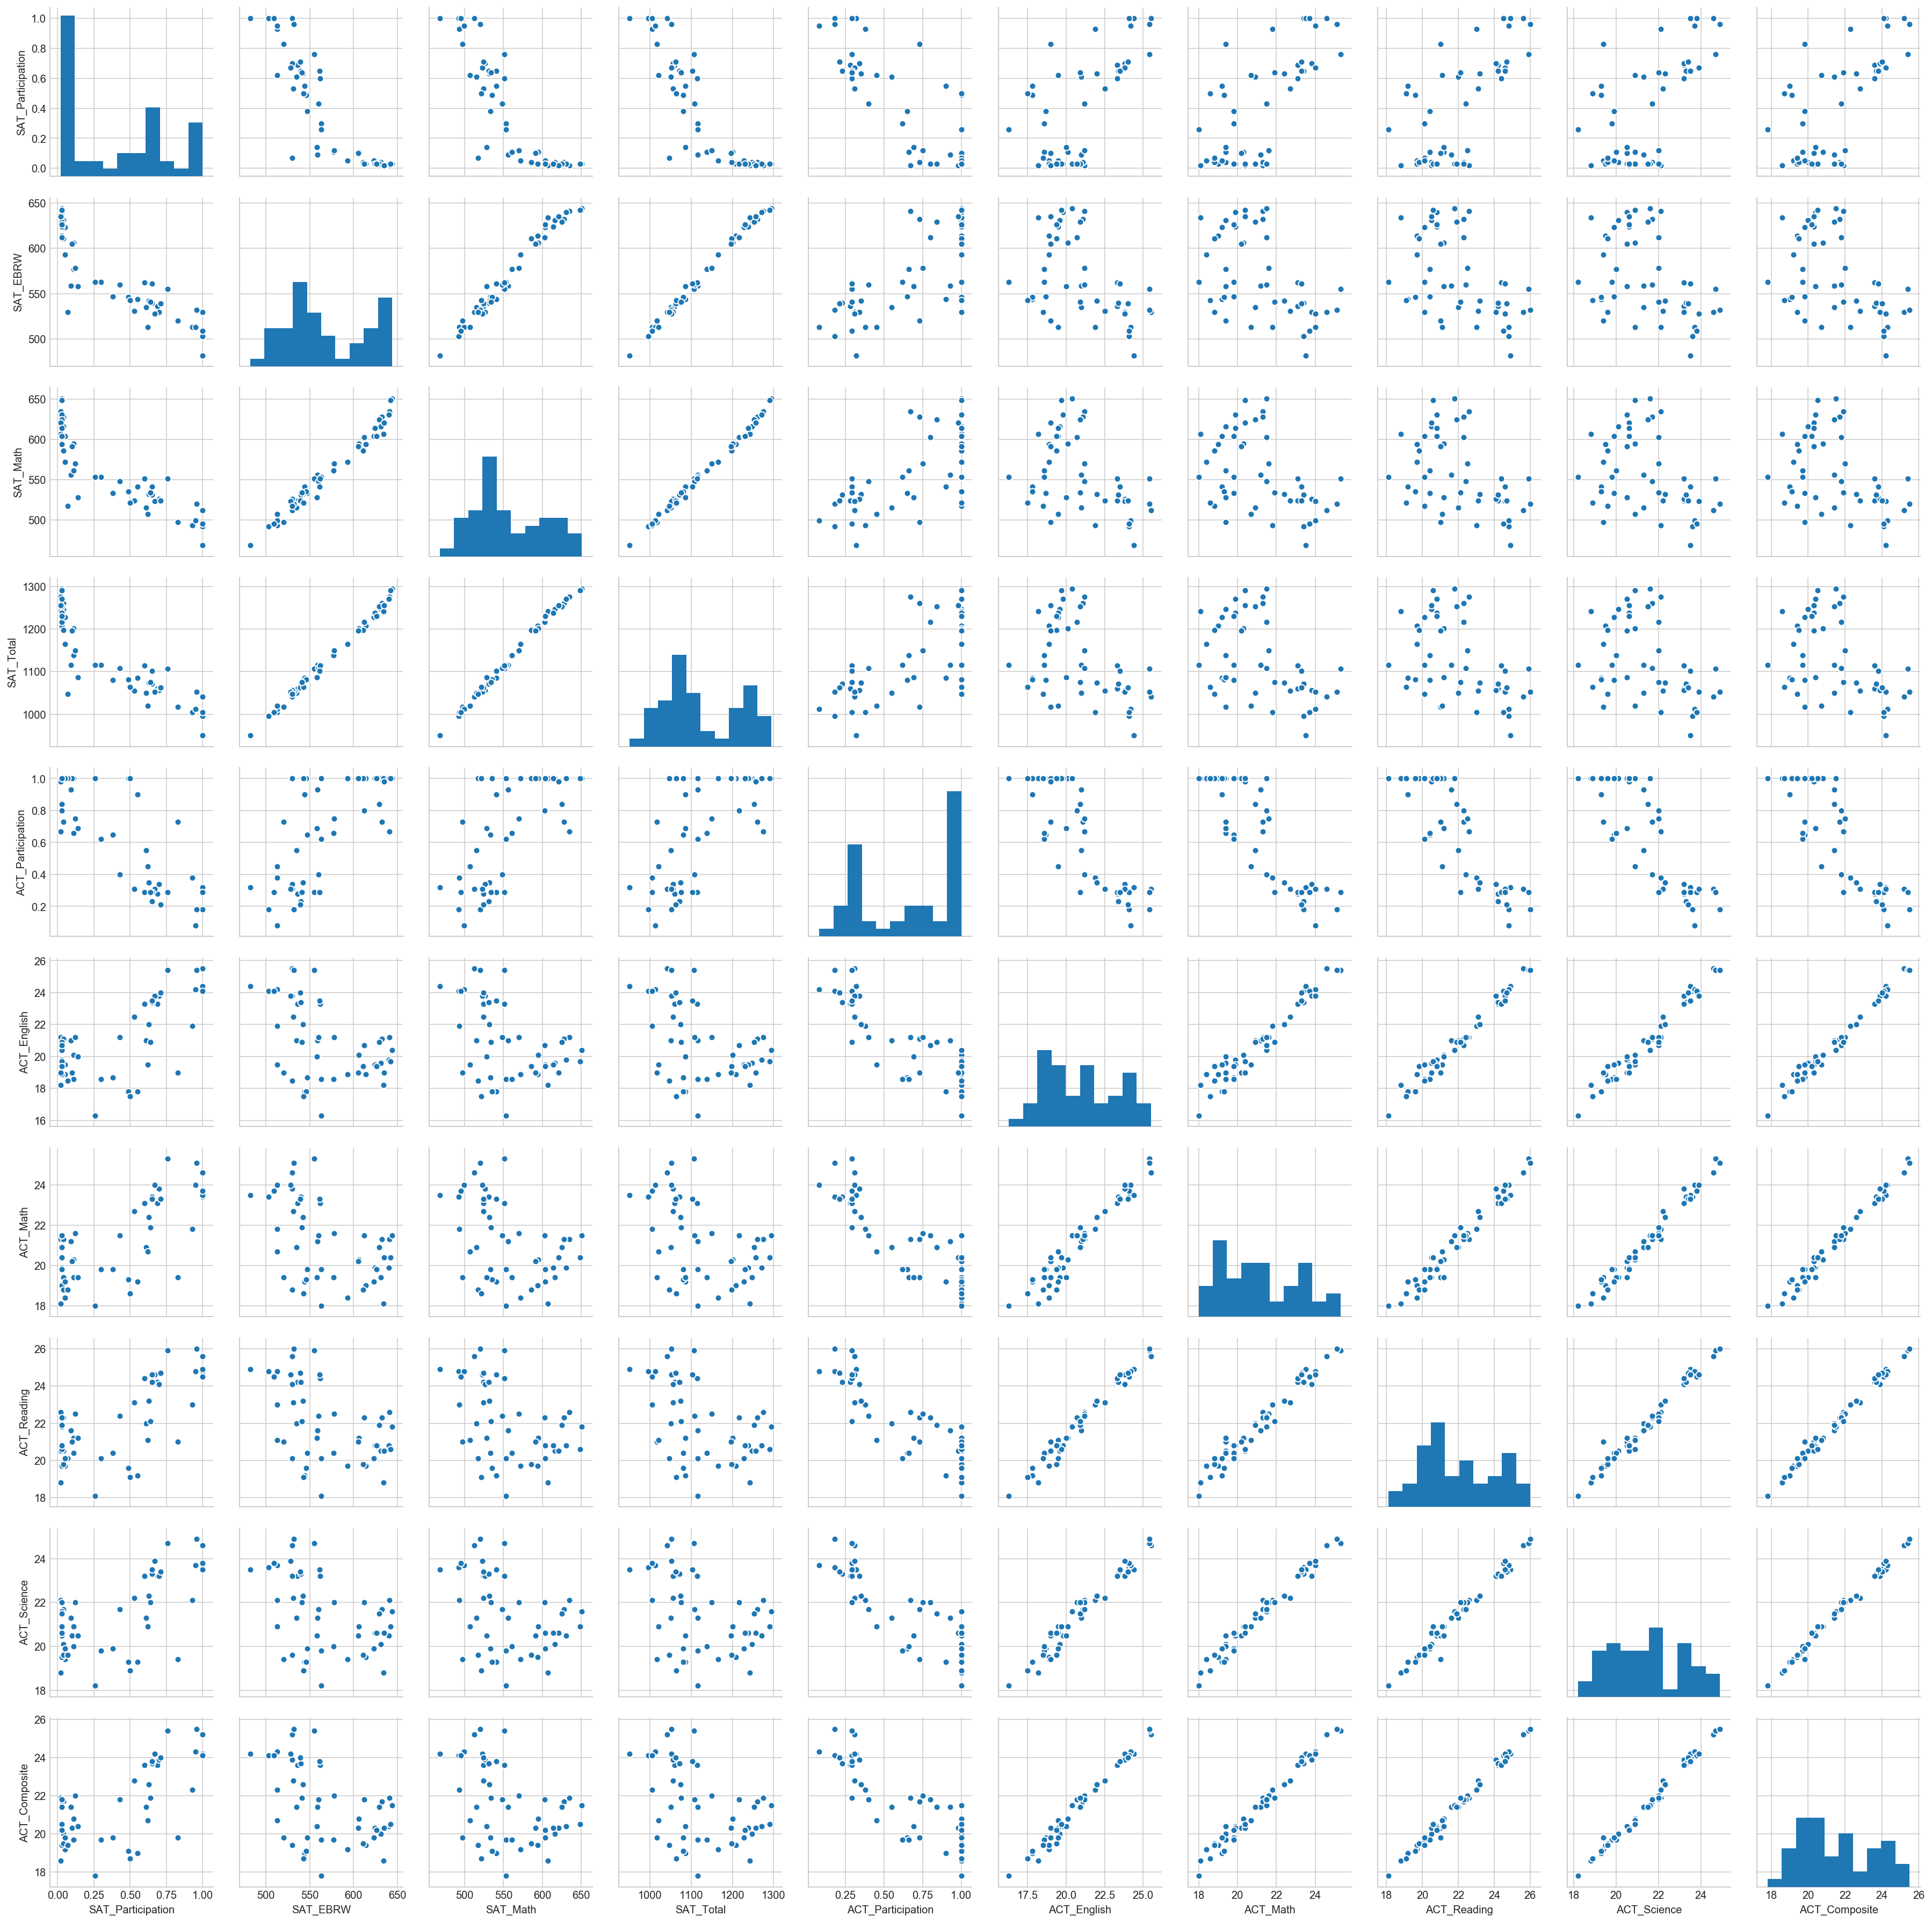

In [28]:
sns.pairplot(data_for_plots)

##### 22. Are there any interesting relationships to note?

In [29]:
#Inverse relationship between ACT and SAT participation, inverse relationship between SAT and ACT test scores.

##### 23. Create box plots for each variable. 

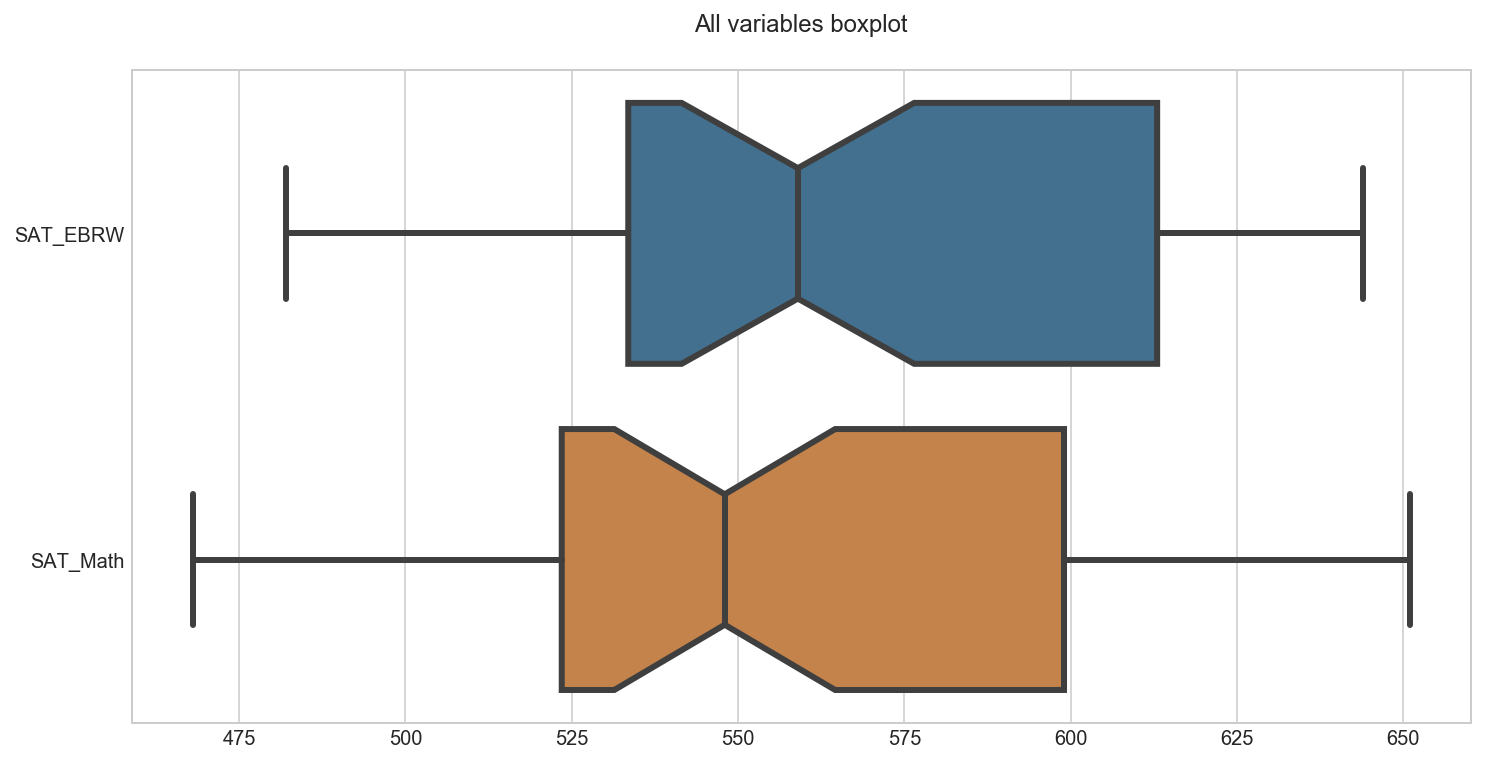

In [30]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=data_for_plots[['SAT_EBRW','SAT_Math']], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

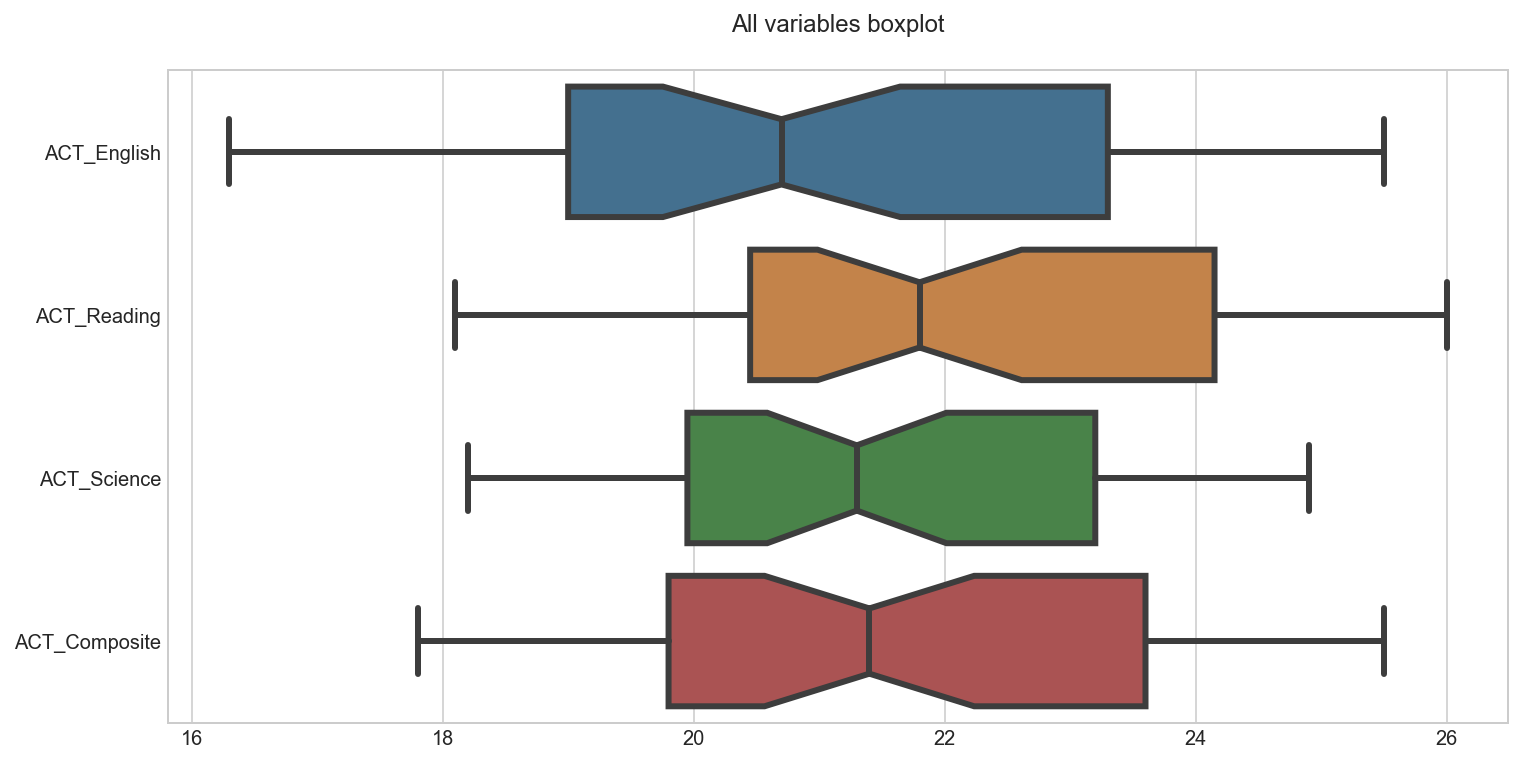

In [31]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=data_for_plots[['ACT_English','ACT_Reading','ACT_Science','ACT_Composite']], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

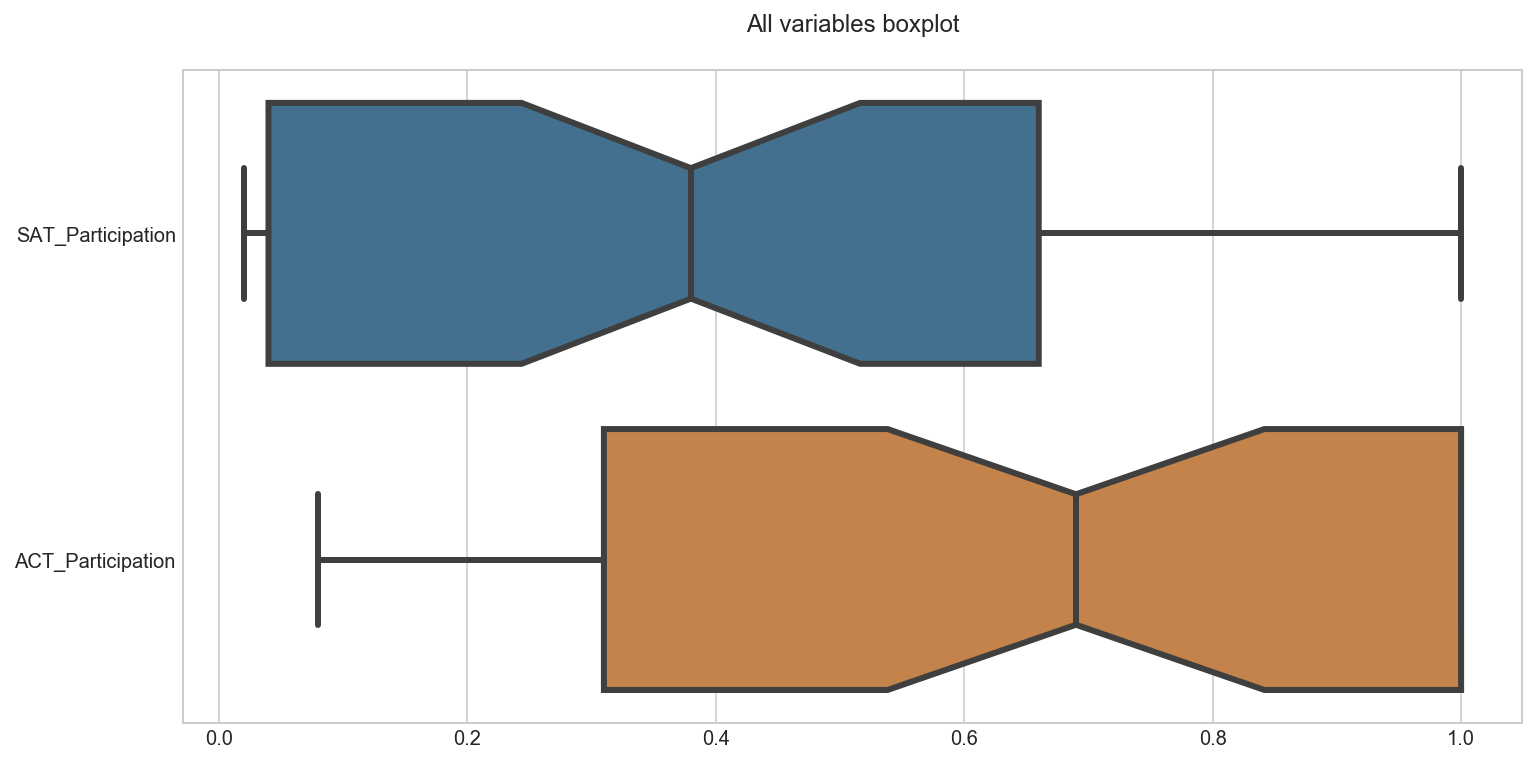

In [32]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=data_for_plots[['SAT_Participation','ACT_Participation']], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

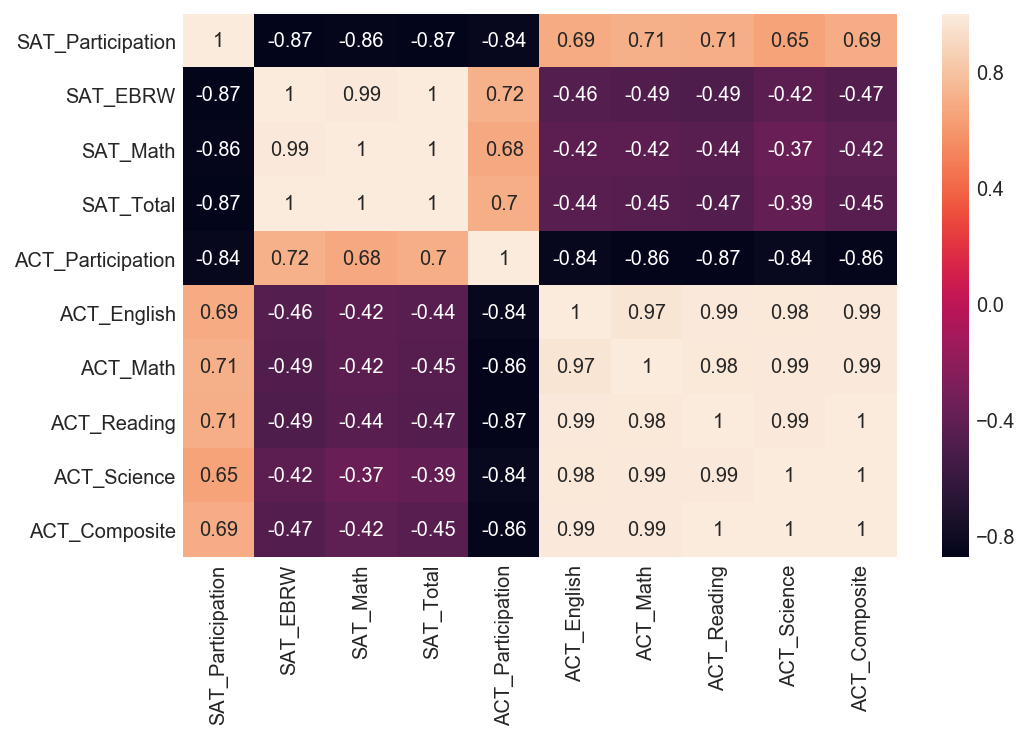

In [33]:
plt.figure(figsize=(8,5))
sns.heatmap(data_for_plots.corr(), annot=True)

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [34]:
data_for_plots.describe()

,SAT_Participation,SAT_EBRW,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

Participation appears to be negatively correlated between the ACT and SAT. Presumably states tend to take one or the other, not both.
ACT scores tend to be negatively correlated with ACT Participation. Lower participation implies that students taking the non-dominant test are looking to stand out from the crowd, and are therefore higher performing students.

SAT EBRW, Math, and Total scores are highly positively correlated.
ACT Math, Reading, Science, and English scores are also highly positively correlated.

ACT Math and SAT Math scores are negatively correlated. However, this is most likely due to the inverse relationship of participation rates, as well as the inverse relationship between test performance and participation. 

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

Null hypothesis: ACT and SAT participation rates are sampled from populations with the same mean.

Any difference in our sample is due to random chance
    
Alternative hypothesis: The population means for ACT participation and SAT participation are different

In [35]:
#Since the p-value is less than 5%, we can reject the null hypothesis. 

t_stat, p_value = stats.ttest_ind(data_for_plots["SAT_Participation"], data_for_plots["ACT_Participation"])

t_stat, p_value

(-3.8085778908170544, 0.00024134203698662353)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [36]:
#SAT

norm_samples_5 = [np.mean(np.random.choice(data_for_plots["SAT_Participation"], 5, replace=True)) for i in range(1000)]

stats.norm.interval(0.95, np.mean(norm_samples_5), np.std(norm_samples_5))

(0.09201482681196438, 0.7090331731880356)

In [37]:
#SAT

stats.norm.interval(0.95, data_for_plots["SAT_Participation"].mean(), data_for_plots["SAT_Participation"].std())

(-0.2933700717646155, 1.0894485031371646)

The wide confidence interval suggests that the population is not normally distributed.

In [38]:
#ACT

norm_samples_5 = [np.mean(np.random.choice(data_for_plots["ACT_Participation"], 5, replace=True)) for i in range(1000)]

stats.norm.interval(0.95, np.mean(norm_samples_5), np.std(norm_samples_5))

(0.37542484605533794, 0.9371231539446621)

In [39]:
# ACT
stats.norm.interval(0.95, data_for_plots["ACT_Participation"].mean(), data_for_plots["ACT_Participation"].std())

(0.022600091768543606, 1.2824979474471425)

The wide confidence interval suggests that the population is not normally distributed.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, participation in either test does not appear to be normally distributed.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

No, they are not indepedent. Both are influenced by participation in their respective categories, and SAT/ACt participation appears to be correlated. 

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

No. If we had scores on a student to student basis instead of state averages, we would have a better understanding of how the 2 test scores were correlated.

##### Analysis for Presentation

In [98]:
#Consider ACT Composite scores separated into two groups based on SAT participation.
#One group for above and one for below the median participation rate

data_high_sat = data_for_plots.sort_values("SAT_Participation")[25:]
data_high_sat = data_for_plots.sort_values("SAT_Participation")[25:]

act_composite_low_sat = data_for_plots.sort_values("SAT_Participation")[:25]["ACT_Composite"].values

act_composite_high_sat = data_for_plots.sort_values("SAT_Participation")[25:]["ACT_Composite"].values

In [99]:
#Perform T test on two groups. Assuming null hypothesis is that there is no difference between the two groups.
t_stat, p_value = stats.ttest_ind(act_composite_low_sat, act_composite_high_sat)
t_stat, p_value

#the p value is well below 5%, which means we can reject the null hypothesis. 

(-5.087646224373688, 5.72358330888649e-06)

In [100]:
# Generate points on the x axis between -4 and 4:
xpoints = np.linspace(-5, 5, 500)

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, (50+50-2), 0, 1)

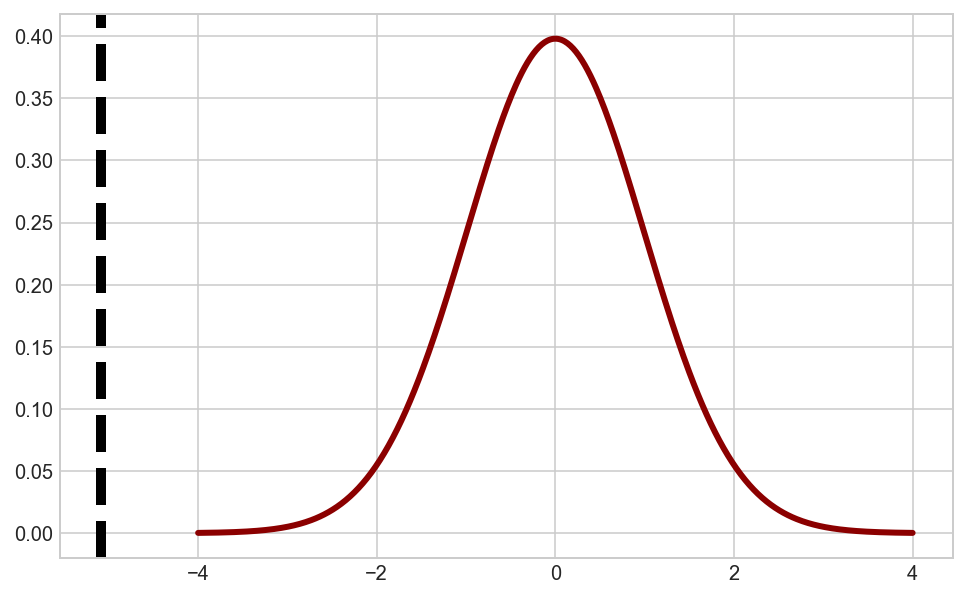

In [81]:
# Initialize a `matplotlib` "figure."
fig = plt.figure(figsize=(8,5))

# Get the current "axis" out of the figure.
ax = fig.gca()

# Plot the lines using `matplotlib`'s plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# Plot a vertical line for our measured difference in rates' t-statistic.
ax.axvline(t_stat, color='black', linestyle='--', lw=5)

In [87]:
sum(data_for_plots["ACT_Participation"] > data_for_plots["SAT_Participation"])

29

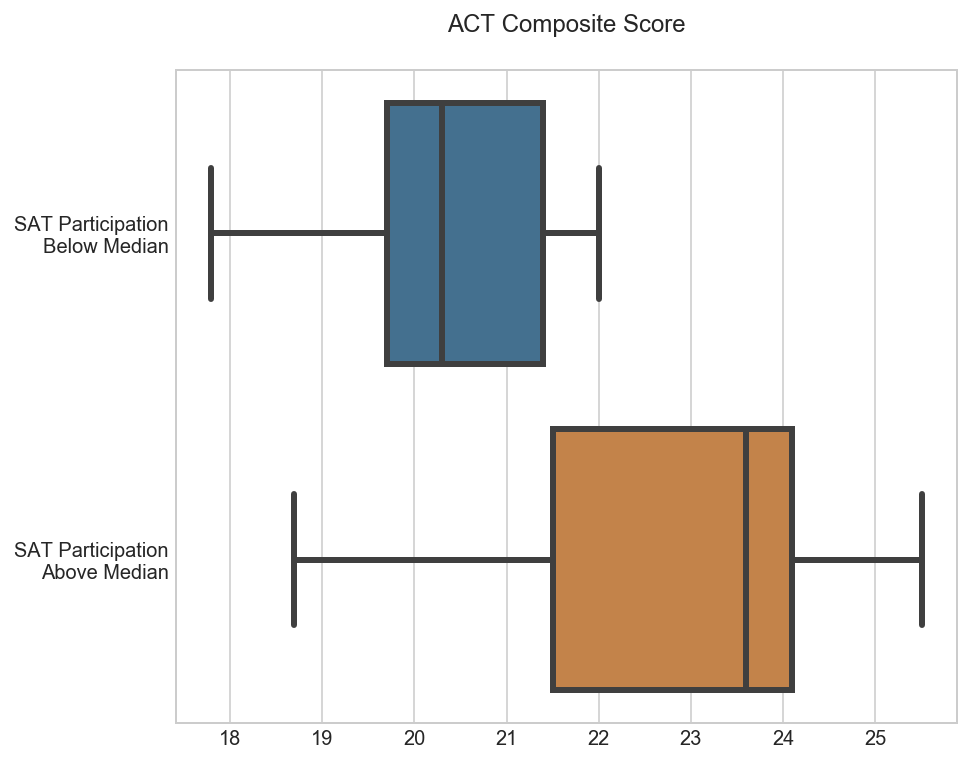

In [113]:
fig = plt.figure(figsize=(7,6))
ax = fig.gca()

ax = sns.boxplot(data=[data_for_plots.sort_values("SAT_Participation")[:25]["ACT_Composite"], data_for_plots.sort_values("SAT_Participation")[25:]["ACT_Composite"]], orient='h', fliersize=5, linewidth=3, notch=False,
                 saturation=0.5, ax=ax)

ax.set_title('ACT Composite Score\n')
ax.set_yticklabels(["SAT Participation\nBelow Median", "SAT Participation\nAbove Median"])
plt.show()